In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# load data from csv
career_stats = {}
with open('ipl_batting_career.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        career_stats.setdefault(row['Name'], {})
        for attr in list(row.keys())[1:]: # get every attribute except Name
            val = float(row[attr])
            if val.is_integer():
                career_stats[row['Name']][attr] = int(val)
            else:
                career_stats[row['Name']][attr] = val

In [4]:
# def most_of(attr):
#     try:
#         name_attr = {}
#         with open('ipl_batting_career.csv') as f:
#             reader = csv.DictReader(f)
#             for row in reader:
#                 name_attr[row['Name']] = int(row[attr])

#         return sorted(list(name_attr.keys()), key=lambda t: name_attr[t])[-1]
#     except KeyError as e:
#         print('Invalid attribute')


In [5]:
# most_of('30s')


'V Kohli'

In [6]:
# # get most of all the stats
# for attr in list(career_stats['D Padikkal'].keys())[1:]:  # skipping the name attr
#     name = most_of(attr)
#     print(attr, ':', name, '-', career_stats[name][attr])


Inns : RG Sharma - 211
Runs : V Kohli - 6508
Balls : V Kohli - 5115
Outs : RG Sharma - 183
30s : V Kohli - 45
50s : DA Warner - 53
100s : CH Gayle - 6
4s : S Dhawan - 674
6s : CH Gayle - 375


#### get most runs scored by a batsman above or below a certain criteria

In [26]:
def most_of(attr, gta=None, lta=None, gt=None, lt=None, least = False, top=1):
    '''
    attr: attribute whose maximum val is to be found
    gta: greater than attr
    gt: greater than val
    lta: lesser than attr
    lt: lesser than value
    least: if True, give lowest value
    top: get more than one top vals
    '''
    name_attr = {}
    if gta and lta:
        pass
    elif gta:
        lta = 'Runs'
        lt = 922337
    elif lta:
        gta = 'Runs'
        gt = 0
    else:
        gta = 'Runs'
        gt = 0
        lta = 'Runs'
        lt = 922337

    try:
        for name in career_stats:
            if int(career_stats[name][gta])>gt and int(career_stats[name][lta])<lt:
                name_attr[name] = int(career_stats[name][attr])

        if top>1:
            return sorted(list(name_attr.keys()), key = lambda t: name_attr[t], reverse=not least)[:top]
        else:
            return sorted(list(name_attr.keys()), key = lambda t: name_attr[t], reverse=least)[-1]

        

    except KeyError as e:
        print('some attribute was invalid')
    

In [27]:
attr = '30s'
most_of(attr, top=10)
# print(name)
# career_stats[name][attr]

['V Kohli',
 'RV Uthappa',
 'RG Sharma',
 'MS Dhoni',
 'S Dhawan',
 'KD Karthik',
 'SK Raina',
 'AT Rayudu',
 'BB McCullum',
 'SR Watson']

In [73]:
name = most_of('4s', gta='Runs', gt=2000, least=True)
print(name)
career_stats[name]['Runs'], career_stats[name]['4s'], career_stats[name]['6s']

JP Duminy


('2029', '126', '79')

### Check Correlation b/w different attributes

In [10]:
def corref(a, b):
    xy = []
    x = sum(a)
    y = sum(b)
    x_2 = []
    y_2 = []
    for i in range(len(a)):
        x_2.append(a[i]**2)
        y_2.append(b[i]**2)
        xy.append(a[i]*b[i])
    sigma_x2 = sum(x_2)
    sigma_y2 = sum(y_2)
    sigma_xy = sum(xy)
    n = len(a)
    corr = (n*sigma_xy-x*y)/((n*sigma_x2-x**2)*(n*sigma_y2-y**2))**0.5
    return corr


In [13]:
def check_corref(at1, at2):
    t1 = []
    t2 = []
    try:
        for name in career_stats:
            t1.append(career_stats[name][at1])
            t2.append(career_stats[name][at2])
        
        c = corref(t1, t2)
        print(f'correlation between: {at1} and {at2}: {c}')
        return c
    except KeyError as e:
        print('Invalid attribute')
    

In [17]:
import itertools

In [19]:
for comb in itertools.combinations(list(career_stats['V Kohli'].keys()), 2):
    check_corref(*comb)

correlation between: Inns and Runs: 0.9581433343446092
correlation between: Inns and Balls: 0.9603772428182251
correlation between: Inns and Outs: 0.9876615398561126
correlation between: Inns and 30s: 0.94107024713141
correlation between: Inns and 50s: 0.8624379101583258
correlation between: Inns and 100s: 0.5501618120541618
correlation between: Inns and 4s: 0.9332292791864091
correlation between: Inns and 6s: 0.8917398328759981
correlation between: Runs and Balls: 0.9966059193735107
correlation between: Runs and Outs: 0.9735760220607398
correlation between: Runs and 30s: 0.9629717655971298
correlation between: Runs and 50s: 0.960445545651989
correlation between: Runs and 100s: 0.6725642128337819
correlation between: Runs and 4s: 0.9847916563577287
correlation between: Runs and 6s: 0.9304221430391393
correlation between: Balls and Outs: 0.976702150859091
correlation between: Balls and 30s: 0.966292302030361
correlation between: Balls and 50s: 0.9538854517217699
correlation between: Bal

In [34]:
def percentile_list(attr, percentile, below=False):
    ''' get list of all players above the mentioned percentile'''
    name_attr = {}
    for name in career_stats:
        name_attr[name] = career_stats[name][attr]
    percentile_index = int(percentile*len(name_attr.keys())/100)
    p_list = sorted(list(name_attr.keys()), key = lambda t:name_attr[t], reverse=below)
    return career_stats[p_list[percentile_index]][attr], p_list[percentile_index:]


In [42]:
percentile_list('Runs', 95)

(2461,
 ['SA Yadav',
  'SE Marsh',
  'SPD Smith',
  'SS Iyer',
  'M Vijay',
  'RR Pant',
  'V Sehwag',
  'Yuvraj Singh',
  'PA Patel',
  'BB McCullum',
  'F du Plessis',
  'SV Samson',
  'YK Pathan',
  'KA Pollard',
  'KL Rahul',
  'MK Pandey',
  'SR Watson',
  'AT Rayudu',
  'AM Rahane',
  'KD Karthik',
  'G Gambhir',
  'MS Dhoni',
  'RV Uthappa',
  'CH Gayle',
  'AB de Villiers',
  'SK Raina',
  'DA Warner',
  'RG Sharma',
  'S Dhawan',
  'V Kohli'])

In [45]:
percentile_list('4s', 98)

(377,
 ['SR Watson',
  'KD Karthik',
  'AB de Villiers',
  'CH Gayle',
  'AM Rahane',
  'RV Uthappa',
  'G Gambhir',
  'RG Sharma',
  'SK Raina',
  'DA Warner',
  'V Kohli',
  'S Dhawan'])

### Create bar charts for all career stats

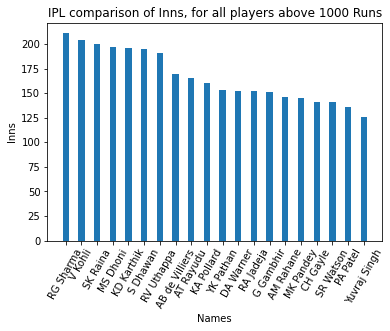

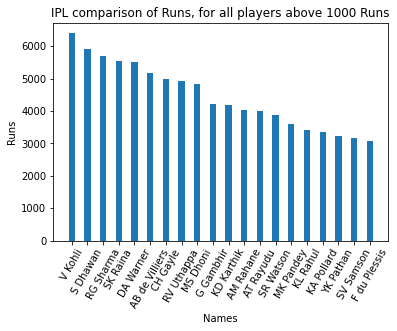

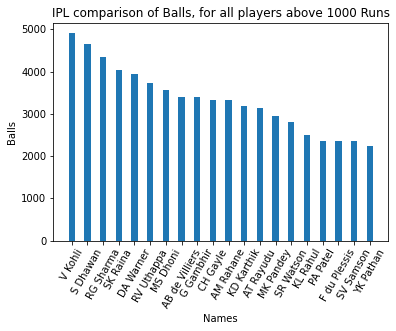

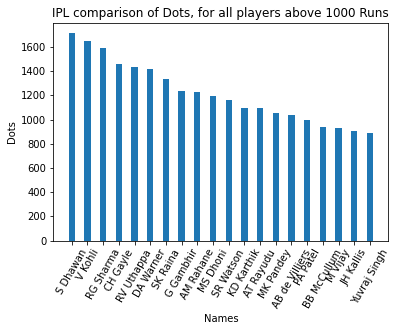

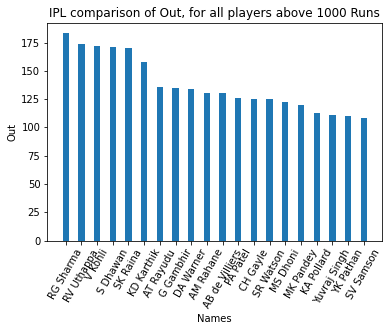

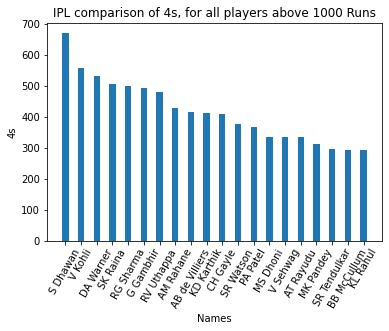

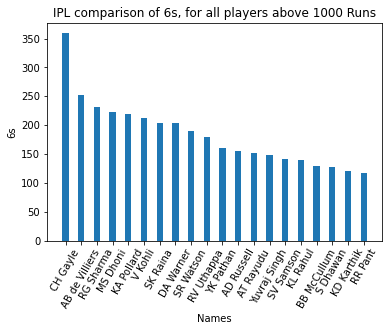

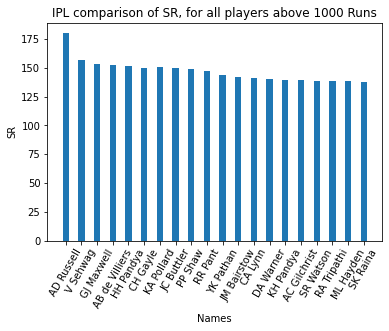

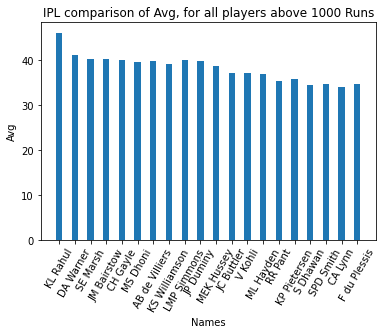

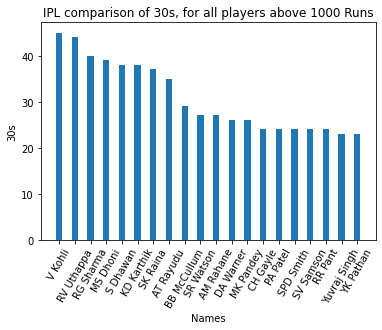

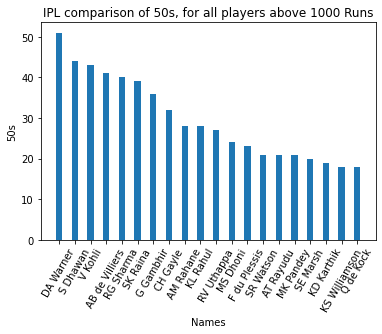

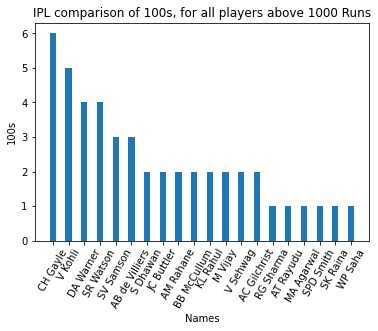

In [40]:
for attr in career_stats['V Kohli']:
    top_num  = 20
    gt_attr = 'Runs'
    gt_val = 1000
    names = most_of(attr, gta=gt_attr , gt=gt_runs ,top=top_num)

    values = [career_stats[name][attr] for name in names]

    plt.bar(range(len(names)), values, tick_label=names, width=0.4)
    plt.xticks(rotation=60)
    plt.xlabel('Names')
    plt.ylabel(attr)
    plt.title(f'IPL comparison of {attr}, for all players above {gt_val} {gt_attr}')
    # plt.figure(figsize=(10, 5))
    plt.show()